In [2]:
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()# type: ignore

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

In [6]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

426
426
143
143


In [7]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [8]:
print('훈련 세트 정확도 : ', mlp.score(x_train, y_train))
print('테스트 세트 정확도 : ', mlp.score(x_test, y_test))

훈련 세트 정확도 :  0.9272300469483568
테스트 세트 정확도 :  0.9300699300699301


MLP 정확도가 꽤 높음
- 정확도를 높일 수 있는 방법?
- 평균 0, 분산 1이 가지도록 데이터를 변형해주면 성능이 좋아질 수 있다.
- standardscaler : 데이터가 평균 0, 분산1 이 되도록 스케일링을 진행

In [9]:
from sklearn.preprocessing import StandardScaler
#스케일러 정의
#스케일러 학습
#데이터 변환
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

#### Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

max_iter : 값을 늘려주는게 좋다

In [11]:
#score : accuracy
print('훈련 세트 정확도 : ', mlp.score(x_train_scaled, y_train))
print('테스트 세트 정확도 : ', mlp.score(x_test_scaled, y_test))

훈련 세트 정확도 :  0.9906103286384976
테스트 세트 정확도 :  0.965034965034965


In [12]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [13]:
print('훈련 세트 정확도 : ', mlp.score(x_train_scaled, y_train))
print('테스트 세트 정확도 : ', mlp.score(x_test_scaled, y_test))

훈련 세트 정확도 :  1.0
테스트 세트 정확도 :  0.972027972027972


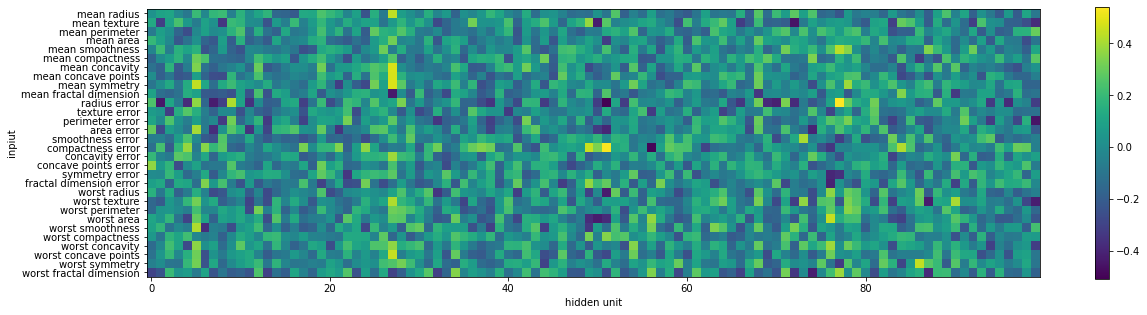

In [16]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)  # type: ignore
plt.xlabel('hidden unit')
plt.ylabel('inpiut')
plt.colorbar()

In [ ]:
hidden_layer_sizes = (100, )